## Dynamical Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Euler Method

Numerically integrating dy/dt = y with the Euler Method

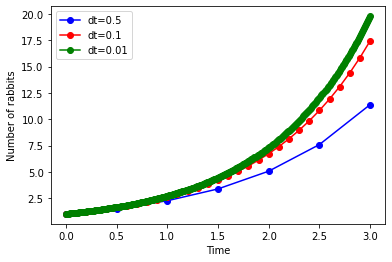

In [3]:
def sim(dt,duration):
    time = np.arange(0.0,duration+dt,dt)
    y_hist = np.zeros(len(time))
    y = 1
    i = 0
    for t in time:
        y_hist[i] = y
        y = y + dt * y      
        i += 1
    return time,y_hist


timeA,y_histA = sim(0.5,3)
timeB,y_histB = sim(0.1,3)
timeC,y_histC = sim(0.01,3)

# Visualize it
plt.plot(timeA,y_histA,'bo-',label="dt=0.5")
plt.plot(timeB,y_histB,'ro-',label="dt=0.1")
plt.plot(timeC,y_histC,'go-',label="dt=0.01")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Number of rabbits")
plt.show()

 ### Lotka Volterra

Class

In [4]:
class LotkaVolterra():

    def __init__(self,dt,a,b,c,d,x,y):
        self.dt = dt
        # Model Parameters
        self.a = a  # alpha = reproduction rate of prey
        self.b = b  # beta = mortality rate of predator per prey
        self.c = c  # gamma = mortality rate of predator
        self.d = d  # delta = reproduction rate of predator per prey
        # Model Variables
        self.x = x  # Starting value of prey (rabbits)
        self.y = y  # Starting value of predator (foxes)
    
    def step(self):
        dxdt = self.a * self.x - self.b * self.x * self.y    # Diff eq. 1
        dydt = self.d * self.x * self.y - self.c * self.y    # Diff eq. 2       
        self.x = self.x + self.dt * dxdt                     # Euler step
        self.y = self.y + self.dt * dydt                     # Euler step        

Visualize the results for different set of parameters

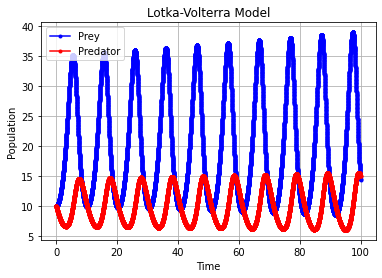

In [39]:
a = 1.0     # alpha = reproduction rate of prey
b = 0.1     # beta = mortality rate of predator per prey
c = 0.4     # gamma = mortality rate of predator
d = 0.02    # delta = reproduction rate of predator per prey

x = 10      # Starting value of prey (rabbits)
y = 10      # Starting value of predator (foxes)
dt = 0.1
lv = LotkaVolterra(dt, a,b,c,d,x,y)

duration = 100
time = np.arange(0.0,duration+dt,dt)
x_hist = np.zeros(len(time))
y_hist = np.zeros(len(time))
i = 0
for t in time:
    x_hist[i] = lv.x
    y_hist[i] = lv.y
    lv.step()
    i += 1

# time, x_hist, y_hist = sim_lv(dt,3,10,10)

plt.plot(time, x_hist, 'b.-', label="Prey")
plt.plot(time, y_hist, 'r.-', label="Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Lotka-Volterra Model")
plt.grid()
plt.show()

### CTRNN